In [1]:
# suggesting install a python virtual environment:
# -- python version 3.7.16
# -- orange3=3.32.0
# This scipt is used to plot the Nemanyi CD graph、ridge graphs
# Comparing different molecular features and downstream methods

import matplotlib.pyplot as plt
import numpy as np
import Orange
import os
import pandas as pd
import csv
import joypy
import seaborn as sns

In [2]:
## Part 1: Compare different methods (all methods use NYAN latents)

all_methods = os.listdir('./result_toxric/')  
all_datasets = os.listdir('./result_toxric/Adaboost/')
all_metrics = ['AUROC','AUPRC','accuracy','f1','recall','mcc','gmean']

In [15]:
metric = all_metrics[2] # select one metric

# [num_methods, num_datasets],record the 5-CV avg. performance
performance_mat = np.zeros((len(all_methods), len(all_datasets))) 

 # [num_methods, num_datasets],record the ranking
rank_mat = np.zeros((len(all_methods), len(all_datasets)),dtype=int) 

for i, method in enumerate(all_methods):
    for j, dataset in enumerate(all_datasets):
        df = pd.read_csv('./result_toxric/{}/{}'.format(method,dataset))
        performance_mat[i,j] = float(df[metric].mean())
        
        
for col in range(len(all_datasets)): # each column
    sort_index = performance_mat[:,col].argsort()[::-1]    
    for rank, index in enumerate(sort_index):
        rank_mat[:,col][index] = rank+1 

In [16]:
# save the performance into .csv
with open('./table_results/performace_with_different_methods_{}.csv'.format(metric), 'w', newline='') as file:
    writer = csv.writer(file)
    header = ['method']+all_datasets
    writer.writerow(header)
    for i,row in enumerate(performance_mat):
        writer.writerow([all_methods[i]]+list(row))
        
# save the rank result into .csv
with open('./table_results/rank_with_different_methods_{}.csv'.format(metric), 'w', newline='') as file:
    writer = csv.writer(file)
    header = ['method']+all_datasets
    writer.writerow(header)
    for i,row in enumerate(rank_mat):
        writer.writerow([all_methods[i]]+list(row))

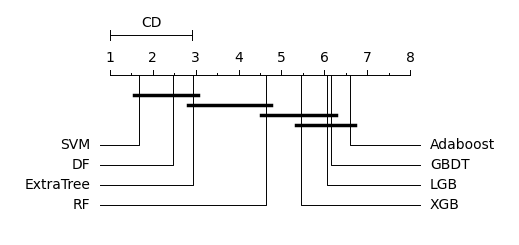

metric:accuracy, feature: NYAN_latent


In [17]:
# the first type of CD graph

avranks = rank_mat.mean(1).tolist()
datasets_num = len(all_datasets)
CD = Orange.evaluation.scoring.compute_CD(avranks, datasets_num, alpha='0.05', test='nemenyi')
a = Orange.evaluation.scoring.graph_ranks(filename='./figures/compare_method_with_{}.pdf'.format(metric),
                                          avranks=avranks, 
                                          names=all_methods, 
                                          cd=CD, width=5, textspace=1, reverse=False)
plt.show()
plt.close()
print('metric:{}, feature: NYAN_latent'.format(metric))

In [18]:
# # transpose the dataframe
# pd_rank = pd.read_csv('./table_results/rank_with_different_methods_{}.csv'.format(metric))
# pd_rank=pd_rank.transpose()
# pd_rank.to_csv('./table_results/rank_with_different_methods_{}_t.csv'.format(metric),index=True)

In [19]:
methods = ['DF','ExtraTree','SVM', 'RF','XGB', 'GBDT',  'Adaboost', 'LGB']
pal = sns.color_palette(palette='GnBu', n_colors=8)

# plot the Ridge graphs using KDE
pd_rank = pd.read_csv('./table_results/rank_with_different_methods_{}_t.csv'.format(metric))

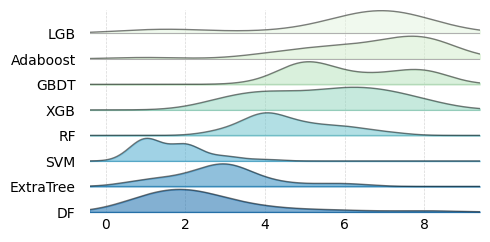

In [20]:
fig, axes=joypy.joyplot(pd_rank, column=methods[::-1], ylim='own',linewidth=1,
                       figsize=(5,2.6),grid=True, color=pal, legend=True,alpha=0.5, overlap=0.1)
# plt.bar(0.5,11)
# plt.title('Performance distribution of toxicity estimation over 59 endpoints', fontsize=11)
# plt.xlabel('Ranking with {}'.format(metric), fontsize=10)
plt.grid(axis='x', linestyle='--',linewidth=0.5, alpha=0.5)
plt.show()
fig.savefig('./figures/compare_method_with_{}_ridge.pdf'.format(metric), bbox_inches='tight', pad_inches=0.1)

In [21]:
if metric == 'AUROC':
    avranks_0 = avranks
if metric == 'AUPRC':
    avranks_1 = avranks
if metric == 'accuracy':
    avranks_2 = avranks

In [22]:
# # the second type of CD graph
# barcolor = 'steelblue'
# dotcolor = 'firebrick'
# fig = plt.figure(figsize=(12,3.5))



# # AUROC
# ax1 = fig.add_subplot(1, 3, 1) 
# ax1.errorbar(avranks_0, all_methods,xerr=CD,fmt='o',ecolor=barcolor,color=dotcolor, alpha=1)
# ax1.set_xlim(-0.8, 9.8)
# ax1.set_yticks(np.arange(8), all_methods, fontsize=14)
# ax1.set_xticks(range(10))
# ax1.set_xticklabels(range(10), fontsize=14)
# ax1.set_title('AUROC', fontsize=14)
# ax1.grid() 

# # AUPRC
# ax2 = fig.add_subplot(1, 3, 2) 
# ax2.errorbar(avranks_1,all_methods,xerr=CD,fmt='o',ecolor=barcolor,color=dotcolor, alpha=1)
# ax2.set_xlim(-0.8, 9.8)
# ax2.set_yticks(np.arange(8),['']*8)
# ax2.set_xticks(range(10))
# ax2.set_xticklabels(range(10), fontsize=14)
# ax2.set_title('AUPRC', fontsize=14)
# ax2.set_xlabel('Average Rank', size=14)
# ax2.grid() 


# # accuracy
# ax3 = fig.add_subplot(1, 3, 3) 
# ax3.errorbar(avranks_2,all_methods,xerr=CD,fmt='o',ecolor=barcolor,color=dotcolor, alpha=1)
# ax3.set_xlim(-0.8, 9.8)
# ax3.set_yticks(np.arange(8),['']*8)
# ax3.set_xticks(range(10))
# ax3.set_xticklabels(range(10), fontsize=14)
# ax3.set_title('Accuracy', fontsize=14)
# ax3.grid() 

# plt.subplots_adjust(hspace=0.1, wspace=0.06)
# plt.show()
# fig.savefig('./figures/compare_methods_CDbar.pdf', bbox_inches='tight', pad_inches=0.1)
# plt.close()

In [23]:
# # the second type of CD graph
# barcolor = 'steelblue'
# dotcolor = 'coral'

# fig = plt.figure(figsize=(6,4))
# plt.errorbar(avranks,all_methods,xerr=CD,fmt='o',ecolor=barcolor,color=dotcolor, alpha=1)
# plt.ylabel('Method', fontdict={'family':'Arial', 'size': 16})
# plt.xlabel('Average Rank ({})'.format(metric), fontdict={'family' : 'Arial', 'size'   : 16})
# plt.yticks(fontproperties = 'Arial', size = 14)
# plt.xticks(range(0,10),fontproperties = 'Arial', size = 14)
# plt.xlim(-0.5, 9.5)
# plt.grid(linewidth='0.5') 
# plt.show()
# fig.savefig('./figures/compare_method_with_{}_CDbar.pdf'.format(metric), bbox_inches='tight', pad_inches=0.1)
# plt.close()

In [24]:
## Part 2: Compare different fingerpringts under different method
all_methods = os.listdir('./result_otherFG_toxric/MACCS')
all_datasets = os.listdir('./result_otherFG_toxric/MACCS/RF')
all_metrics = ['AUROC','AUPRC','accuracy','f1','recall','mcc','gmean']
all_features = ['NYAN_latent'] + os.listdir('./result_otherFG_toxric/')

In [25]:
all_methods

['ExtraTree', 'DF', 'XGB', 'RF', 'SVM']

In [26]:
all_features

['NYAN_latent',
 'Morgan512',
 'Atompair',
 'ECFP2',
 'Mordred',
 'Rdkit2D',
 'Morgan1024',
 'Topological Torsion',
 'MACCS',
 'Avalon']

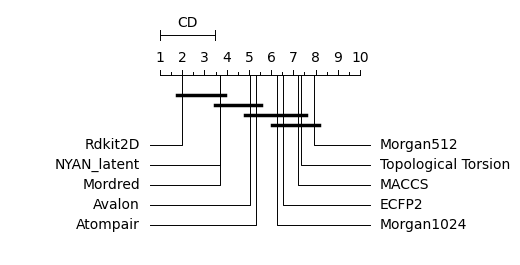

metric:AUROC, method:ExtraTree


In [40]:
method = all_methods[0] # select one method
metric = all_metrics[0] # select one metric

# [num_features, num_datasets],record the 5-CV avg. performance
performance_mat = np.zeros((len(all_features), len(all_datasets))) 

 # [num_features, num_datasets],record the ranking
rank_mat = np.zeros((len(all_features), len(all_datasets)),dtype=int) 

for i, feature in enumerate(all_features):
    for j, dataset in enumerate(all_datasets):
        
        if feature == 'NYAN_latent':
            df = pd.read_csv('./result_toxric/{}/{}'.format(method,dataset))
        else:
            df = pd.read_csv('./result_otherFG_toxric/{}/{}/{}'.format(feature,method,dataset))
            
        performance_mat[i,j] = float(df[metric].mean())
        
        
for col in range(len(all_datasets)): # each column
    sort_index = performance_mat[:,col].argsort()[::-1]    
    for rank, index in enumerate(sort_index):
        rank_mat[:,col][index] = rank+1 
        
        
# the first type of CD graph

avranks = rank_mat.mean(1).tolist()
datasets_num = len(all_datasets)
CD = Orange.evaluation.scoring.compute_CD(avranks, datasets_num, alpha='0.05', test='nemenyi')
a = Orange.evaluation.scoring.graph_ranks(filename='./figures/compare_feature_with_{}+{}.pdf'.format(method,metric),
                                          avranks=avranks, 
                                          names=all_features, 
                                          cd=CD, width=5, textspace=1.5, reverse=False)
plt.show()
plt.close()
print('metric:{}, method:{}'.format(metric,method))

# # the second type of CD graph

# fig = plt.figure(figsize=(6,4))
# plt.errorbar(avranks,all_features,xerr=CD,fmt='o',ecolor='mediumblue',color='crimson')
# plt.ylabel('Feature', fontdict={'family':'Arial', 'size': 16})
# plt.xlabel('Average Rank (metric:{}, method:{})'.format(metric,method), 
#            fontdict={'family' : 'Arial', 'size'   : 16})
# plt.yticks(fontproperties = 'Arial', size = 14)
# plt.xticks(range(0,10),fontproperties = 'Arial', size = 14)
# plt.xlim(-1, 10)
# plt.grid(linewidth='0.5') 
# plt.show()
# fig.savefig('./figures/compare_feature_with_{}+{}_CDbar.pdf'.format(method,metric),
#             bbox_inches='tight', pad_inches=0.1)
# plt.close()

In [41]:
# save the performance into .csv
with open('./table_results/performace_with_different_features_{0}+{1}.csv'.format(method,metric), 'w', newline='') as file:
    writer = csv.writer(file)
    header = ['method']+all_datasets
    writer.writerow(header)
    for i,row in enumerate(performance_mat):
        writer.writerow([all_features[i]]+list(row))
        
# save the rank result into .csv
with open('./table_results/rank_with_different_features_{0}+{1}.csv'.format(method,metric), 'w', newline='') as file:
    writer = csv.writer(file)
    header = ['method']+all_datasets
    writer.writerow(header)
    for i,row in enumerate(rank_mat):
        writer.writerow([all_features[i]]+list(row))

In [42]:
# # transpose the dataframe
# pd_rank = pd.read_csv('./table_results/rank_with_different_features_{0}+{1}.csv'.format(method,metric))
# pd_rank=pd_rank.transpose()
# pd_rank.to_csv('./table_results/rank_with_different_features_{0}+{1}_t.csv'.format(method,metric),index=True)

In [43]:
# plot the Ridge graphs using KDE
pd_rank = pd.read_csv('./table_results/rank_with_different_features_{0}+{1}_t.csv'.format(method,metric))

In [44]:
features_AUROC = ['Rdkit2D', 'NYAN_latent', 'Mordred', 'Avalon', 'Atompair',
             'Morgan1024', 'ECFP2', 'MACCS','Topological Torsion','Morgan512' ]
features_AUPRC = ['Rdkit2D', 'NYAN_latent', 'Mordred', 'Morgan1024','Avalon', 
             'Atompair','Morgan512' , 'Topological Torsion', 'ECFP2', 'MACCS']
features_accuracy = ['Rdkit2D','Mordred', 'Avalon',  'NYAN_latent',  'Atompair',
             'ECFP2','MACCS','Topological Torsion','Morgan1024','Morgan512']
pal = sns.color_palette(palette='GnBu', n_colors=10)


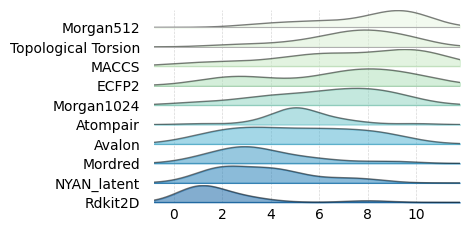

In [45]:
# plt.figure(figsize=(6,6), dpi=80)
if metric == 'AUROC':
    features = features_AUROC
elif metric == 'AUPRC':
    features = features_AUROC
elif metric == 'accuracy':
    features = features_AUROC
fig, axes=joypy.joyplot(pd_rank, column=features[::-1], ylim='own',linewidth=1,
                       figsize=(4.8,2.5),grid=True, color=pal, legend=True,alpha=0.5, overlap=0.1)
# plt.bar(0.5,11)
# plt.title('Performance distribution of toxicity estimation over 59 endpoints', fontsize=11)
# plt.xlabel('Ranking with {}'.format(metric), fontsize=10)
plt.grid(axis='x', linestyle='--',linewidth=0.5, alpha=0.5)
plt.show()
fig.savefig('./figures/compare_feature_with_{}+{}_ridge.pdf'.format(method,metric), bbox_inches='tight', pad_inches=0.1)